# Fondements du Machine Learning - L3 IM2D, 2022-2023
# TP 1 : Interpolation et régression linéaire

# Preambule

Run this code to import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import MT19937, RandomState, SeedSequence

# 0 - Context
Interpolation is a classical machine learning problem. It consists on finding a function $h^*$ inside a family of functions $\mathcal{H}$ that best fits some data that has been observed. A very common choice of $\mathcal{H}$ is the set of linear functions, and a common method to find $h^*$ is linear regression using the least squares criterion.

Given a dataset represented as a matrix $X \in \mathbf{R}^{n \times d}$ with $n$ observations, each of them with $d$ features, and the corresponding target values $Y \in \mathbf{R}^{n}$, the least squares objective is to find a vector $\beta^{LS} \in \mathbf{R}^{d + 1}$ that minimizes the sum of squared errors

$$\beta^{LS} = \underset{\beta \in \mathbf{R}^{d + 1}}{\operatorname{argmin}} \sum_{i = 1}^{n} \left( \sum_{j=1}^{d} x_{i, j} \cdot \beta_j + \beta_0 - y_i \right)^2 = \underset{\beta \in \mathbf{R}^{d + 1}}{\operatorname{argmin}} \ \lVert \tilde{X} \beta - Y \rVert_{2}^{2} $$

where $\tilde{X}$ is obtained by adding a first column of ones into $X$. When there is no ambiguity, we will use $X$ to refer to $\tilde{X}$.

An important feature of linear regression is that it is not limited to finding linear functions of the data. One can augment the matrix $X$ by creating new features of the original data and use the same linear model to fit a non linear model.


In this TP we will use linear regression to fit polynomials of different degree. As the degree of a polynomial increases, it becomes a more general and complex function. This control over the complexity of the family of functions $\mathcal{H}$ that we consider will allow us to visualize two important concepts in machine learning: over-fitting and under-fitting 

# 1 - Generate data

We begin by creating a dataset from a model that we consider the ground truth. 

For this TP, we will consider $d=1$, meaning we have only one original feature ($X \in \mathbf{R}^{n \times 1}$). 

On the other hand, we consider that the real relation between $X$ and $Y$ is polynomial with a true vector of coefficients $\beta^*$. This means that in the true model we assume that

$$y = \sum_{i=0}^{k} x^k \beta^*_k$$

We introduce a very common hypothesis which is that the observations $y_i$ we receive are produced by this original model but with some gaussian noise $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$ independent between observations.

\\

---

\\

***TASK***

Create a dataset $X,Y$ using the following procedure:

1. Create $X$: sample $n = 20$ points from an uniform distribution $\textit{U}(-2, 2)$
2. Define $\beta^* = (1.0, 0.5, -0.6, 2, -6, 1) / 146.4$. Our model is generated by a degree 5 polynomial defined by $\beta^*$
3. Create a function that expands the matrix $X$ into a polynomial basis. This means transform each row of the matrix $(x_i)$ into the row $(1, x_i, x_i^2, \dots, x_i^k)$ for a given degree $k$. Use this function to create the expanded data matrix $X_{poly}$ using a degree 5 (the real degree).

4. Create $Y$ from $X_{poly}$ and $\beta^*$ by fixing some value for $\sigma$ and then computing $Y = X_{poly} \beta^* + \epsilon$, where the vector $\epsilon$ is such that each $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$

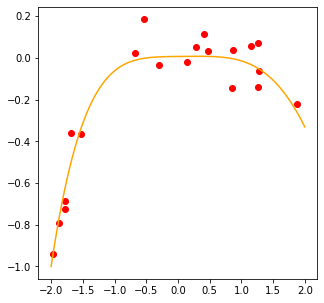

In [ ]:
# Seed the pseudorandom generator. Use rs instead of np.random for generating 
# numbers
rs = RandomState(MT19937(SeedSequence(2111)))


# Create X
n = 20
x_min, x_max = -2, 2
X = ... # Your code here


# Here we define beta^*, the ground truth
real_beta = np.array([1.0, 0.5, -0.6, 2, -6, 1]) / 146.4


# Create X_poly
def poly_expand(X, degree=3):
    '''
        Your code here
    '''
    return # Your code here

X_poly = poly_expand(X, degree=len(real_beta)-1)



# Create Y
sigma = 0.1
Y = ... # Your code here



# Optional: Plot the real polynomial and the obtained points
fig, ax = plt.subplots(1, 1, figsize= (5,5))

'''
Your code here
'''

# 2 - Fit a linear model using Least Squares

Use the closed form solution of the Least Squares estimator $\beta^{LS}$ to compute it.

1. Create a function that takes as input some matrix $A$ and a vector $b$ and returns

$$\beta^{LS} =  \underset{\beta \in \mathbf{R}^{d + 1}}{\operatorname{argmin}} \ \lVert A \beta - b \rVert_{2}^{2} $$

2. Compare $\beta^{LS}$ to $\beta^*$ for different values of $\sigma$. What happens when $\sigma → 0$?

Norm of the difference: 0.10227912280891695
Real beta: [ 0.0068306   0.0034153  -0.00409836  0.0136612  -0.04098361  0.0068306 ]
LS beta with sigma = 0.1: [ 0.04654998 -0.07134616 -0.0105921   0.06998433 -0.04129807 -0.00208857]


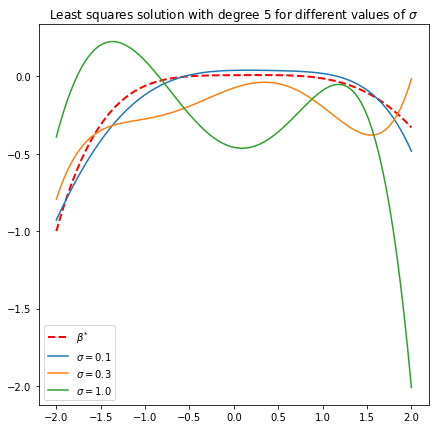

In [ ]:
# Create the function least_squares that return beta^LS
def least_squares(A, b):
    '''
        Your code here
    '''
    return # Your code here


# Find beta_ls for our problem using X_poly and Y
X_poly = poly_expand(X, degree=len(real_beta)-1)
beta_ls = least_squares(X_poly, Y)


# Compare the real beta and the one obtained
print(f"Norm of the difference: {np.linalg.norm(real_beta - beta_ls)}")
print(f"Real beta: {real_beta}")
print(f"LS beta with sigma = {sigma}: {beta_ls}")


# Optional: Compare betas by plotting the resulting polynomial

rs = RandomState(MT19937(SeedSequence(11)))

fig, ax = plt.subplots(1, 1, figsize= (7,7))
'''
    Your code here
'''

# 3 - Computing the error

For our linear regression problem we have a very clear error metric: the *Mean Squared Error*. It is very similar to the objective function, but divided by the number of observations to obtained a metric that does not depend on the size of the dataset.

In our problem, we have a fixed $X_{poly} \in \mathbf{R}^{n \times 6}$ and $Y \in \mathbf{R}^n$, and for any $\beta \in \mathbf{R}^6$ we can compute

$$MSE(\beta) = \lVert X_{poly} \beta - Y \rVert_{2}^{2}$$


Such a metric that measures the performance of the learned parameters can be computed on the same data that was used to learn the model or on new data. We distinguish between the *train* and *test* metrics, as both give different information about the learning procedure.

In general, the *train metric* should improve as we allow a more complex family of functions. For this TP, think of the complexity we allow as the degree of the polynomial we use to fit the model. Polynomials of higher degree are much more flexible and can approximate much more complex functions than linear functions (polynomials of degree 1).

On the other hand, the *test metric* has a more complex behaviour. This metric measures the capacity of the learned model to generalize to unseen data. It will in general start improving as we increase complexity, but at some point it will start to degrade. **In a nutshell: extremely simple models generalize poorly to unseen data, but very complex ones too!**


We call **under-fitting** the situation where the complexity of the family of functions we allow is not enough to capture the real relation in the data. For example, consider our case when the real data was generated by a degree 5 polynomial: if we restrict ourselves to only linear functions, we can not expect the resulting estimator to model the real behaviour very well.


We call **over-fitting** the situation where the complexity of the family of functions we allow is too big, so that not only we capture the real relation of the data, but also we increase too much the sensibility of our estimators to noise in the data. In our case, imagine if we allowed ourselves to use polynomials of degree 100. Such polynomials can perfectly fit the 20 points we have as training data, but they can have a very erratic behaviour around the training points (unseen data). This will lead to polynomials that don't capture the real 5 degree behaviour, but a much more complex and erratic one that gives bizarre results when tested on unseed data.


\\

---

\\

***TASK***

In order to visualize the concepts described above:

1. Create the function $MSE$
2. Create a testing set $X^{test}$ by sampling again $n_test = 100$ points from an uniform distribution $\textit{U}(-1, 1)$
3. Plot the evolution of the train and test $MSE$ as the complexity increases. This means computing $\beta^{LS}$ for different degrees $k$ of the polynomial expansion and computing the $MSE$ in each case.
4. Plot the original data and the resulting polynomials when using degrees $1$, $5$ and $40$ for the estimation. Be careful with the axis limits.

In [ ]:
# MSE function
def MSE(beta, X_poly, Y):
    '''
        Your code here
    '''
    return # Your code here


rs = RandomState(MT19937(SeedSequence(123)))
# Create test set. Dont forget to create the labels
n_test = 1000
X_test = ... # Your code here
Y_test = ... # Your code here


# Plot test data
fig, ax = plt.subplots(1, 1, figsize= (5,5))
'''
    Your code here
'''

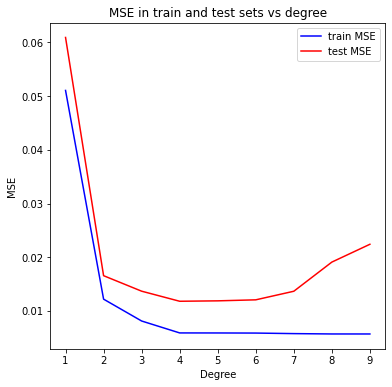

In [ ]:
# Plot MSE in function of degree (complexity) of the family of allowed functions
degrees = list(range(1, 10))
MSE_train, MSE_test = [], []

for d in degrees:
    
    # Train
    '''
        Your code here
    '''

    # Test (we do not re-estimate beta_ls)
    '''
        Your code here
    '''


# Plot
fig, ax = plt.subplots(1, 1, figsize= (6,6))
ax.plot(degrees, MSE_train, label = 'train MSE', c = 'blue')
ax.plot(degrees, MSE_test, label = 'test MSE', c = 'red')

ax.set_title("MSE in train and test sets vs degree")
ax.set_xlabel("Degree")
ax.set_ylabel("MSE")
ax.legend();

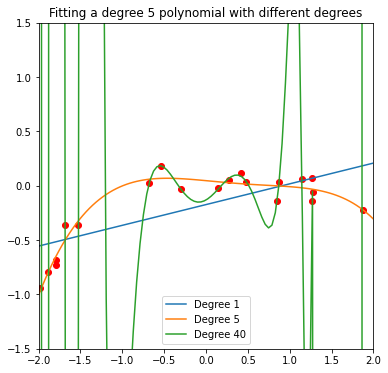

In [ ]:
# Plot polynomials with degree 1, 5 and 40
fig, ax = plt.subplots(1, 1, figsize = (6, 6))

cmap = 'coolwarm'
# Original data
ax.scatter(X, Y, cmap = cmap, c = 'red')


for degree in [1, 5, 40]:
    # Estimate model
    '''
        Your code here
    '''

    # Plot polynomial
    '''
        Your code here
    '''

ax.set_xlim(x_min, x_max)
ax.set_ylim(-1.5, 1.5)
ax.set_title("Fitting a degree 5 polynomial with different degrees")
ax.legend();